# **`SPACY - INTRO:`**

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u'Samprith is a very brilliant and succesful person. He is on top of his career seeking $6 million for his new startup in India!')

for token in doc:
  print(token.text, token.pos_)

Samprith PROPN
is AUX
a DET
very ADV
brilliant ADJ
and CCONJ
succesful ADJ
person NOUN
. PUNCT
He PRON
is AUX
on ADP
top NOUN
of ADP
his PRON
career NOUN
seeking VERB
$ SYM
6 NUM
million NUM
for ADP
his PRON
new ADJ
startup NOUN
in ADP
India PROPN
! PUNCT


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

for token in doc2:
  print(token.text,token.pos_)

Tesla PROPN
is AUX
n't PART
looking VERB
into ADP
startups NOUN
anymore ADV
. PUNCT


In [ ]:
print(doc2)
print(doc2[4])
print(type(doc2))
print(doc2[5].pos_)
print(spacy.explain('CCONJ'))
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla isn't looking into startups anymore.
into
<class 'spacy.tokens.doc.Doc'>
NOUN
coordinating conjunction
ADP
IN / conjunction, subordinating or preposition
Tesla: Xxxxx
and : xxx


In [ ]:
doc3 = nlp(u'In this section we will cover two important types of Tensor objects: Variables and placeholders. We then move forward to the main event: optimization. We will briefly talk about all the basic components for optimizing a model, and then do some simple demonstration that puts everything together.')
doc3

In this section we will cover two important types of Tensor objects: Variables and placeholders. We then move forward to the main event: optimization. We will briefly talk about all the basic components for optimizing a model, and then do some simple demonstration that puts everything together.

In [ ]:
objective = doc3[28:41]
print(objective)
print(type(doc3))
print(type(objective))

We will briefly talk about all the basic components for optimizing a model
<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.span.Span'>


In [ ]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')
for sentence in doc4.sents:
  print(sentence)
print(doc4[8].is_sent_start)
print(doc4[6].is_sent_start)

This is the first sentence.
This is another sentence.
This is the last sentence.
False
True


# **`TOKENIZATION:`**

In [ ]:
mystring = '"We\'re moving to U.S.A.!"'
print(mystring)

"We're moving to U.S.A.!"


In [ ]:
string = nlp(mystring)

for token in string:
  print(token.text,token.shape_,sep=" -> ",end=" | ")

" -> " | We -> Xx | 're -> 'xx | moving -> xxxx | to -> xx | U.S.A. -> X.X.X. | ! -> ! | " -> " | 

In [ ]:
len(string)

8

In [ ]:
len(string.vocab)

826

In [ ]:
string2 = nlp(u'Amazon is funding $4 billion in a company known as KipLock, which is based in India ')

for token in string2:
  print(token.text,end=' | ')
print("\n------------------------------")

for ent in string2.ents:
  print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Amazon | is | funding | $ | 4 | billion | in | a | company | known | as | KipLock | , | which | is | based | in | India | 
------------------------------
Amazon - ORG - Companies, agencies, institutions, etc.
$4 billion - MONEY - Monetary values, including unit
KipLock - ORG - Companies, agencies, institutions, etc.
India - GPE - Countries, cities, states


In [ ]:
print(len(string2.ents))

4


In [ ]:
x = nlp(u'A glamorous girl passed by this raining morning. Idiotic I, couldnt do a single thing tho I knew I had a blue, shining car with me')

for chunk in x.noun_chunks:
  print(chunk.text)

A glamorous girl
this raining morning
Idiotic I
a single thing
I
I
a blue, shining car
me


In [ ]:
from spacy import displacy

string = nlp(u'Samprith, along with his mind-blowing team consisting of 10 people from his class, is going to initiate the program which is funded by the NASA on 24/10/2023.')

for token in string:
  print(token.text)

Samprith
,
along
with
his
mind
-
blowing
team
consisting
of
10
people
from
his
class
,
is
going
to
initiate
the
program
which
is
funded
by
the
NASA
on
24/10/2023
.


In [ ]:
displacy.render(string, style='dep', jupyter=True, options = {"compact": True, "bg": "#09a3d5", "color": "white", "font": "Source Sans Pro"})

# **`STEMMING:`**

In [ ]:
import nltk

from nltk.stem.porter import *

In [ ]:
p_stemmer = PorterStemmer()
words = ['running','consolingly','complicated','energetic','problematic','horribly','raining','classes']

for word in words:
  print(word+' --> '+p_stemmer.stem(word))

running --> run
consolingly --> consolingli
complicated --> complic
energetic --> energet
problematic --> problemat
horribly --> horribl
raining --> rain
classes --> class


In [ ]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
words = ['running','consolingly','complicated','energetic','problematic','horribly','raining','classes','mocking','importantly','dithering']

for word in words:
  print(word+" --> "+s_stemmer.stem(word))

running --> run
consolingly --> consol
complicated --> complic
energetic --> energet
problematic --> problemat
horribly --> horribl
raining --> rain
classes --> class
mocking --> mock
importantly --> import
dithering --> dither


# **`LEMMATIZATION AND STOP WORDS:`**

In [ ]:
def show_lemma(text):
  for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [ ]:
show_lemma(string)

Samprith     PROPN  8271106615269427871    Samprith
,            PUNCT  2593208677638477497    ,
along        ADP    3962502770901397382    along
with         ADP    12510949447758279278   with
his          PRON   2661093235354845946    his
mind         NOUN   8811887512194128535    mind
-            PUNCT  9153284864653046197    -
blowing      VERB   17041142777417009832   blow
team         NOUN   4303356597303500170    team
consisting   VERB   13300951158337658757   consist
of           ADP    886050111519832510     of
10           NUM    6572986864102252890    10
people       NOUN   7593739049417968140    people
from         ADP    7831658034963690409    from
his          PRON   2661093235354845946    his
class        NOUN   12859657019542931961   class
,            PUNCT  2593208677638477497    ,
is           AUX    10382539506755952630   be
going        VERB   8004577259940138793    go
to           PART   3791531372978436496    to
initiate     VERB   14804121843529282404   initiat

In [ ]:
print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))
print(nlp.vocab['why'].is_stop)
print(nlp.vocab['amazing'].is_stop)

{'beforehand', 'further', 'due', 'whither', 'also', 'n‘t', 'seeming', 'name', 'against', 'last', 'twelve', 'there', 'anything', 'him', 'your', 'four', 'anyhow', 'except', 'should', 'whom', "'d", 'seemed', 'doing', 'elsewhere', 'empty', 'in', 'whoever', 'both', 'may', 'nevertheless', 'seem', 're', 'most', 'wherein', 'its', 'still', 'must', 'has', 'because', 'keep', 'perhaps', 'however', 'whereupon', 'any', 'same', 'been', 'throughout', 'beyond', 'eleven', 'herself', 'had', 'six', 'now', 'show', 'onto', 'after', 'himself', '‘re', 'thru', 'whether', 'our', 'done', "'s", 'itself', 'out', 'something', 'though', 'hers', 'front', 'rather', 'along', 'she', 'my', 'are', 'thus', 'bottom', 'twenty', 'they', 'anyway', 'or', 'move', 'afterwards', 'being', 'below', 'amount', '’ve', 'too', 'since', 'why', 'themselves', 'always', 'on', 'here', 'quite', 'nor', 'once', 'say', 'me', 'this', 'either', 'meanwhile', 'together', 'first', 'few', 'amongst', 'more', "'ve", 'used', 'of', 'somewhere', 'yet', 'eve

In [ ]:
nlp.Defaults.stop_words.add('btw')
nlp.vocab['btw'].is_stop = True

In [ ]:
nlp.vocab['btw'].is_stop

True

In [ ]:
nlp.Defaults.stop_words.remove('beyond')
nlp.vocab['beyond'].is_stop=False

In [ ]:
nlp.vocab['beyond'].is_stop

False

# **`VOCABULARY AND MATCHING:`**

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]
pattern = [pattern1,pattern2,pattern3]


matcher.add('SolarPower',pattern)

In [ ]:
string = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

found_matches = matcher(string)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


In [ ]:
for match_id,start,end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span = string[start:end]
  print(match_id,string_id,start,end,span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
# pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

matcher.remove('SolarPower')
pattern = [pattern1,pattern3]
matcher.add('SolarPower',pattern)

In [ ]:
found_matches = matcher(string)
for match_id,start,end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span = string[start:end]
  print(match_id,string_id,start,end,span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


In [ ]:
patt1 = [{'LOWER': 'sunnyday'}]
patt3 = [{'LOWER': 'sunny'}, {'IS_PUNCT': True, 'OP':'*'}, {'LEMMA': 'day'}]

patterns = [patt1,patt3]
matcher.add('SunnyDay',patterns)
iot = nlp(u'It is a beautiful sunny day which i always wanted as sunny-day always brings me joy')
fomatches = matcher(iot)

for match_id,start,end in fomatches:
  string_id = nlp.vocab.strings[match_id]
  span = iot[start:end]
  print(match_id,string_id,start,end,span.text)

15227276790962843629 SunnyDay 4 6 sunny day
15227276790962843629 SunnyDay 11 14 sunny-day


In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LEMMA': 'power'}] # CHANGE THIS PATTERN
patts=[pattern1,pattern2]
# Remove the old patterns to avoid duplication:
# matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', patts)
doc2 = nlp(u'Solar-powered energy runs solar-powered cars.')
found_matches = matcher(doc2)
for match_id,start,end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span = doc2[start:end]
  print(match_id,string_id,start,end,span.text)

8656102463236116519 SolarPower 0 3 Solar-powered
8656102463236116519 SolarPower 5 8 solar-powered


#### ***I haven't covered `PHRASE MATCHER` in this section! I need to learn it from some other resourse.***



# **`PART OF SPEECH - BASICS:`**

In [ ]:
print(string)
print(doc)
print(doc2)
print(string2)

The Solar Power industry continues to grow as demand for solarpower increases. Solar-power cars are gaining popularity.
Samprith is a very brilliant and succesful person. He is on top of his career seeking $6 million for his new startup in India!
Solar-powered energy runs solar-powered cars.
Amazon is funding $4 billion in a company known as KipLock, which is based in India 


In [ ]:
print(doc[4].text,doc[4].pos_,doc[4].tag_,spacy.explain(doc[4].tag_))

brilliant ADJ JJ adjective (English), other noun-modifier (Chinese)


In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

Samprith   PROPN    NNP    noun, proper singular
is         AUX      VBZ    verb, 3rd person singular present
a          DET      DT     determiner
very       ADV      RB     adverb
brilliant  ADJ      JJ     adjective (English), other noun-modifier (Chinese)
and        CCONJ    CC     conjunction, coordinating
succesful  ADJ      JJ     adjective (English), other noun-modifier (Chinese)
person     NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer
He         PRON     PRP    pronoun, personal
is         AUX      VBZ    verb, 3rd person singular present
on         ADP      IN     conjunction, subordinating or preposition
top        NOUN     NN     noun, singular or mass
of         ADP      IN     conjunction, subordinating or preposition
his        PRON     PRP$   pronoun, possessive
career     NOUN     NN     noun, singular or mass
seeking    VERB     VBG    verb, gerund or present participle
$          SYM      $      symbol, currency
6

In [ ]:
POS_counts = doc.count_by(spacy.attrs.POS)

for key,value in sorted(POS_counts.items()):
  print(f'{key}. {doc.vocab[key].text:{5}}: {value}')

84. ADJ  : 3
85. ADP  : 4
86. ADV  : 1
87. AUX  : 2
89. CCONJ: 1
90. DET  : 1
92. NOUN : 4
93. NUM  : 2
95. PRON : 3
96. PROPN: 2
97. PUNCT: 2
99. SYM  : 1
100. VERB : 1


In [ ]:
# Count the different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for key,value in sorted(TAG_counts.items()):
  print(f'{doc.vocab[key].text:{5}}: {value}')

RB   : 1
IN   : 4
VBG  : 1
PRP$ : 2
CD   : 2
JJ   : 3
$    : 1
.    : 2
PRP  : 1
VBZ  : 2
DT   : 1
NN   : 4
NNP  : 2
CC   : 1


In [ ]:
# Count the different dependencies:
DEP_counts = doc.count_by(spacy.attrs.DEP)

for k,v in sorted(DEP_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

399. advcl: 1
400. advmod: 1
402. amod: 2
404. attr: 1
407. cc  : 1
410. conj: 1
415. det : 1
416. dobj: 1
429. nsubj: 2
439. pobj: 4
440. poss: 2
443. prep: 4
445. punct: 2
446. quantmod: 1
7037928807040764755. compound: 1
8206900633647566924. ROOT: 2


# **`NAMED ENTITY RECOGNITION:`**

In [ ]:
def show_ents(msg):
  if msg.ents:
    for ent in msg.ents:
      print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
  else:
    print('No named entities found.')

In [ ]:
kipLock = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

show_ents(kipLock)

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


In [ ]:
print(doc)
for ent in doc.ents:
  print(f'{ent.text:{10}} {ent.start:{2}} {ent.end:{2}} {ent.start_char:{2}} {ent.end_char:{2}} {ent.label_:{2}}')

Samprith is a very brilliant and succesful person. He is on top of his career seeking $6 million for his new startup in India!
Samprith    0  1  0  8 ORG
$6 million 17 20 86 96 MONEY
India      25 26 120 125 GPE


In [ ]:
Lavya = nlp(u'Tesla to build a U.K. factory for $6 million')
show_ents(Lavya)

U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [ ]:
from spacy.tokens import Span

ORG = Lavya.vocab.strings[u'ORG']
new_ent = Span(Lavya,0,1,label = ORG)
Lavya.ents = list(Lavya.ents) + [new_ent]

In [ ]:
show_ents(Lavya)

Tesla - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [ ]:
samya = nlp(u'Our company plans to introduce a new vacuum cleaner. '
          u'If successful, the vacuum cleaner will be our first product.')

show_ents(samya)

first - ORDINAL - "first", "second", etc.


In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

phrase_list = ['vacuum cleaner','vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

matcher.add('NewProduct',phrase_patterns)
matches = matcher(samya)
for match_id,start,end in matches:
  string_id = nlp.vocab.strings[match_id]
  span = samya[start:end]
  print(match_id,string_id,start,end,span.text)

17436358318007586288 NewProduct 7 9 vacuum cleaner
17436358318007586288 NewProduct 14 16 vacuum cleaner


In [ ]:
from spacy.tokens import Span
PROD = samya.vocab.strings[u'PRODUCT']
new_ents = [Span(samya,match[1],match[2],label = PROD) for match in matches]
samya.ents = list(samya.ents) + new_ents

In [ ]:
show_ents(samya)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
first - ORDINAL - "first", "second", etc.


In [ ]:
len([ent for ent in samya.ents if ent.label_== 'PRODUCT'])

2

# **`SENTENCE SENGMENTATION:`**

In [ ]:
kop = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

for sent in kop.sents:
  print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [ ]:
kop_sents = [sent for sent in kop.sents] #or list(doc.sents)
print(kop_sents[1])

This is another sentence.


In [ ]:
kop2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.')

for token in kop2:
    print(token.is_sent_start, ' '+token.text)

True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .


In [ ]:
doc3 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


In [ ]:
def set_custom_boundaries(msg):
  for token in msg[:-1]:
    if token.text == ';':
      msg[token.i+1].is_sent_start = True
  return msg

spacy.language.Language.component("set_custom_boundary", func=set_custom_boundaries)

nlp.add_pipe("set_custom_boundary", before='parser')
nlp.pipe_names

['tok2vec',
 'tagger',
 'set_custom_boundary',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
print("New Text:\n")
doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc4.sents:
    print(sent)
# And yet the new rule doesn't apply to the older Doc object:
print("\n")
print("Old Text:\n")
for sent in doc3.sents:
    print(sent)

print("\nWhich basically shows that the rule is applied for the new doc text only and not to the old ones!")

New Text:

"Management is doing things right;
leadership is doing the right things."
-Peter Drucker


Old Text:

"Management is doing things right; leadership is doing the right things."
-Peter Drucker

Which basically shows that the rule is applied for the new doc text only and not to the old ones!


## In some cases we want to replace spaCy's default sentencizer with our own set of rules. In this section we'll see how the default sentencizer breaks on periods. We'll then replace this behavior with a sentencizer that breaks on linebreaks.

In [ ]:
nlp = spacy.load('en_core_web_sm')  # reset to the original

mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."

# SPACY DEFAULT BEHAVIOR:
doc = nlp(mystring)

for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.']
['This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n', 'third', 'sentence', '.']


In [ ]:
import spacy
from spacy.pipeline.sentencizer import Sentencizer

# Custom sentence segmentation function that breaks on linebreaks
def custom_sentencizer(doc):
    start = 0
    seen_newline = False

    for i, token in enumerate(doc):
        if token.text == "\n":
            yield doc[start:i]
            start = i + 1
            seen_newline = True
        else:
            seen_newline = False

    if not seen_newline:
        yield doc[start:]

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Add a custom sentencizer before the default sentencizer
custom_sentencizer_component = Sentencizer()
nlp.add_pipe(custom_sentencizer_component, name="custom_sentencizer", before="senter")

# Process the text with the custom sentencizer
text = "This is the first sentence.\nThis is the second sentence."
doc = nlp(text)

# Print the sentences
for sent in doc.sents:
    print(sent.text)


ValueError: ignored

In [ ]:
doc = nlp(mystring)
for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.']
['This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n', 'third', 'sentence', '.']


## I need to work on this and resolve this problem! for gods sake i have been doing it for hours

# **`FEATURE EXTRACTION:`**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df['message']
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()

# X_train_counts = count_vect.fit_transform(X_train)
# X_train_counts.shape

# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_train_tfidf.shape


In [ ]:
#The above two steps can be combined into one menthod
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf=vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(3733, 7082)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',LinearSVC()),])

text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


In [ ]:
text_clf.predict(["Congratulations Kavya! You’ve won a iphone 14 ultra pro max. Claim it here "])

array(['ham'], dtype=object)

In [ ]:
text_clf.predict(["Congratulations! You’ve won a $500 Amazon gift card. Claim it here "])

array(['spam'], dtype=object)

In [ ]:
text_clf.predict([" Congratulations! Your credit score entitles you to a no-interest Visa credit card. Click here to claim: [Link]"])

array(['spam'], dtype=object)

# **TEXT CLASSIFICATION PROJECT PENDING!!**

# **`SEMANTIC ANALYSIS:`**

In [ ]:
!python -m spacy download en_core_web_md


In [ ]:
nlp = spacy.load('en_core_web_md')
oops = nlp(u'I am under the water, please save me!')
oops.vector

array([ 0.71214294, -0.94367445, -2.2712212 , -2.62833   , -1.3230851 ,
        0.734915  , -0.582581  ,  3.5030751 , -2.780169  ,  4.1833906 ,
        4.3296003 ,  1.792449  , -3.277537  ,  1.163467  ,  2.1885839 ,
       -0.40456706,  2.3958392 , -4.535175  , -1.649163  , -2.3492131 ,
        3.2059798 ,  1.1882269 , -0.74063194, -3.6587899 , -0.73611003,
       -0.724171  , -1.932164  , -0.42551604, -0.13422099, -0.19444709,
       -0.58493006, -1.696326  , -0.21250995,  0.08227601, -0.17261897,
        1.1233801 ,  0.32952297,  0.9204413 ,  5.050543  ,  2.507798  ,
       -0.759063  ,  1.8050878 ,  1.239746  , -2.0265799 ,  0.512148  ,
        1.7396011 ,  0.791003  , -2.769386  , -2.141077  ,  0.66716754,
        1.6465578 ,  0.567942  ,  0.96520996, -3.440303  , -1.4655149 ,
        0.5083941 ,  0.36307558,  0.27604398, -1.427863  ,  0.61286   ,
        3.0322633 , -1.8499991 , -1.249498  , -1.3855999 , -1.344773  ,
        0.5285851 , -2.123934  , -2.4869998 ,  3.2361267 ,  2.63

In [ ]:
lavya = nlp(u'lion cat pet')
for token1 in lavya:
    for token2 in lavya:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.3854507803916931
lion pet 0.20031584799289703
cat lion 0.3854507803916931
cat cat 1.0
cat pet 0.732966423034668
pet lion 0.20031584799289703
pet cat 0.732966423034668
pet pet 1.0


In [ ]:
a,b,c = lavya

# Display as a Markdown table (this only works in Jupyter!)
from IPython.display import Markdown, display
display(Markdown(f'<table><tr><th></th><th>{a.text}</th><th>{b.text}</th><th>{c.text}</th></tr>\
<tr><td>**{a.text}**</td><td>{a.similarity(a):{.4}}</td><td>{b.similarity(a):{.4}}</td><td>{c.similarity(a):{.4}}</td></tr>\
<tr><td>**{b.text}**</td><td>{a.similarity(b):{.4}}</td><td>{b.similarity(b):{.4}}</td><td>{c.similarity(b):{.4}}</td></tr>\
<tr><td>**{c.text}**</td><td>{a.similarity(c):{.4}}</td><td>{b.similarity(c):{.4}}</td><td>{c.similarity(c):{.4}}</td></tr>'))

<table><tr><th></th><th>lion</th><th>cat</th><th>pet</th></tr><tr><td>**lion**</td><td>1.0</td><td>0.3855</td><td>0.2003</td></tr><tr><td>**cat**</td><td>0.3855</td><td>1.0</td><td>0.733</td></tr><tr><td>**pet**</td><td>0.2003</td><td>0.733</td><td>1.0</td></tr>

In [ ]:
nlp(u'lion').similarity(nlp(u'dandelion'))

0.14681951826673326

In [ ]:
oops = nlp(u'let us saavu maare sleep nargle')

for token in oops:
  print(token.text,token.has_vector,token.vector_norm,token.is_oov)

let True 65.94006 False
us True 117.16997 False
saavu False 0.0 True
maare False 0.0 True
sleep True 51.785713 False
nargle False 0.0 True


In [ ]:
#Vector arithmetic = "king" - "man" + "woman" = "queen"
from scipy import spatial

cosine_similarity = lambda x,y:1 - spatial.distance.cosine(x,y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab:
  if word.has_vector:
    if word.is_lower:
      if word.is_alpha:
        similarity = cosine_similarity(new_vector,word.vector)
        computed_similarities.append((word,similarity))

computed_similarities = sorted(computed_similarities,key = lambda item: -item[1])
print([w[0].text for w in computed_similarities[:10]])

['king', 'queen', 'the', 'and', 'that', 'havin', 'where', 'she', 'they', 'woman']


# **`SENTIMENT ANALYSIS:`**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
a = 'This was a good movie!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('amazonreviews.tsv',sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [ ]:
df.dropna(inplace=True)

blanks = []

for i,lb,rv in df.itertuples():
  if type(rv)==str:
    if rv.isspace():
      blanks.append(i)

df.drop(blanks,inplace=True)

df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [ ]:
print(sid.polarity_scores(df.loc[0]['review']))
print(df.loc[0]['label'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}
pos


In [ ]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df['negative_score'] = df['scores'].apply(lambda score_dict: score_dict['neg'])
df['positive_score'] = df['scores'].apply(lambda score_dict: score_dict['pos'])
df['neutral_score'] = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['comp_score'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['compound'] = df['comp_score'].apply(lambda c:'pos' if c>=0 else 'neg')
df.head(10)

,label,review,scores,comp_score,compound,negative_score,positive_score,neutral_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos,0.088,0.243,0.669
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos,0.018,0.145,0.837
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos,0.040,0.268,0.692
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos,0.090,0.295,0.615
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos,0.000,0.254,0.746
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",0.9900,pos,0.014,0.249,0.737
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",-0.8744,neg,0.124,0.069,0.806
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...",0.9900,pos,0.072,0.346,0.583
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",0.8353,pos,0.113,0.174,0.712
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",0.8196,pos,0.033,0.190,0.777


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df['label'],df['compound'])

0.7097

In [ ]:
print(classification_report(df['label'],df['compound']))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [ ]:
print(confusion_matrix(df['label'],df['compound']))

[[2629 2468]
 [ 435 4468]]


## *Some Other Dataset*

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
dataset.dropna(inplace = True)
blanks = []

for i,rv,lb in dataset.itertuples():
  if type(rv) == str:
    if rv.isspace():
      blanks.append(i)
dataset.drop(blanks,inplace=True)

In [ ]:
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
print(sid.polarity_scores(dataset.loc[0]['Review']))
print(dataset.loc[0]['Liked'])

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}
1


In [ ]:
dataset['scores'] = dataset['Review'].apply(lambda Review: sid.polarity_scores(Review))
dataset['negative_score'] = dataset['scores'].apply(lambda score_dict: score_dict['neg'])
dataset['positive_score'] = dataset['scores'].apply(lambda score_dict: score_dict['pos'])
dataset['neutral_score'] = dataset['scores'].apply(lambda score_dict: score_dict['neu'])
dataset['comp_score'] = dataset['scores'].apply(lambda score_dict: score_dict['compound'])
dataset['compound'] = dataset['comp_score'].apply(lambda c:1 if c>=0 else 0)
dataset.head()

,Review,Liked,scores,negative_score,positive_score,neutral_score,comp_score,compound
0,Wow... Loved this place.,1,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.000,0.565,0.435,0.5994,1
1,Crust is not good.,0,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...",0.445,0.000,0.555,-0.3412,0
2,Not tasty and the texture was just nasty.,0,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",0.340,0.000,0.660,-0.5574,0
3,Stopped by during the late May bank holiday of...,1,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...",0.093,0.322,0.585,0.6908,1
4,The selection on the menu was great and so wer...,1,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.000,0.272,0.728,0.6249,1


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(dataset['Liked'],dataset['compound'])

0.723

In [ ]:
print(classification_report(dataset['Liked'],dataset['compound']))

              precision    recall  f1-score   support

           0       0.93      0.48      0.63       500
           1       0.65      0.97      0.78       500

    accuracy                           0.72      1000
   macro avg       0.79      0.72      0.71      1000
weighted avg       0.79      0.72      0.71      1000



In [ ]:
print(confusion_matrix(dataset['Liked'],dataset['compound']))

[[240 260]
 [ 17 483]]


# **`TOPIC MODELING:`**

### LDA -> CountVectorization -> LatentDirichletAllocation()| NMF -> TfidfVectorization -> NMF()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
npr = pd.read_csv('npr.csv')
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
dtm = CV.fit_transform(npr['Article'])

In [ ]:
#document term matrix
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components = 7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [ ]:
len(CV.get_feature_names_out())

54777

In [ ]:
import random

for i in range(10):
  random_word_id = random.randint(0,54776)
  print(CV.get_feature_names_out()[random_word_id])

align
chiefs
discographies
fence
impervious
brine
commissioned
punishes
gratis
pardons


In [ ]:
#Number of topics
len(LDA.components_)


7

In [ ]:
print(len(LDA.components_[3]))
print(len(LDA.components_[6]))

54777
54777


In [ ]:
single_topic = LDA.components_[4]
single_topic.argsort()

array([ 2475, 18302, 35285, ...,  9767, 42561, 50426])

In [ ]:
top_word_indices = single_topic.argsort()[-10:]

for index in top_word_indices:
  print(CV.get_feature_names_out()[index])

obama
court
republican
campaign
people
state
president
clinton
said
trump


In [ ]:
for index,topic in enumerate(LDA.components_):
  print(f'The TOP 15 words for TOPIC #{index+1}')
  print([CV.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print("\n")

The TOP 15 words for TOPIC #1
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


The TOP 15 words for TOPIC #2
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


The TOP 15 words for TOPIC #3
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


The TOP 15 words for TOPIC #4
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


The TOP 15 words for TOPIC #5
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


The TOP 15 words for TOPIC #6
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

In [ ]:
dtm.shape

(11992, 54777)

In [ ]:
topic_results = LDA.transform(dtm)


In [ ]:
print(topic_results[0])
print(topic_results[0].round(2))
print(topic_results[0].argmax())

[1.61040465e-02 6.83341493e-01 2.25376318e-04 2.25369288e-04
 2.99652737e-01 2.25479379e-04 2.25497980e-04]
[0.02 0.68 0.   0.   0.3  0.   0.  ]
1


In [ ]:
npr['Topic'] = topic_results.argmax(axis=1)


In [ ]:
npr.head()

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2


# **PROJECT : QUORA**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('quora_questions.csv')
dataset.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.90, min_df = 2, stop_words = "english")

In [ ]:
Document_term_matrix = tfidf.fit_transform(dataset['Question'])

In [ ]:
Document_term_matrix

<220881x29039 sparse matrix of type '<class 'numpy.float64'>'
	with 1084692 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF
NMF_model = NMF(n_components = 20,random_state=42)
NMF_model.fit(Document_term_matrix)

NMF(n_components=20, random_state=42)

In [ ]:
len(tfidf.get_feature_names_out())

29039

In [ ]:
for index,topic in enumerate(NMF_model.components_):
  print(f"THE TOP 15 WORDS FOR TOPIC #{index+1}")
  print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print("\n")

THE TOP 15 WORDS FOR TOPIC #1
['website', 'place', 'read', 'visit', 'places', 'phone', 'buy', 'ways', 'laptop', 'movie', '2016', 'books', 'book', 'movies', 'best']


THE TOP 15 WORDS FOR TOPIC #2
['majors', 'grads', 'recruit', 'looking', 'use', 'sex', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #3
['add', 'answered', 'easily', 'post', 'needing', 'improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #4
['job', 'making', 'friends', 'com', 'internet', 'black', 'free', 'easy', 'home', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #5
['balance', 'death', 'earth', 'day', 'live', 'want', 'changed', 'change', 'moment', 'real', 'thing', 'important', 'meaning', 'purpose', 'life']


THE TOP 15 WORDS FOR TOPIC #6
['engineering', 'prime', 'reservation', 'buy', 'president', 'country', 'minister', 'china', 'available', 'ol

In [ ]:
dataset.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
Topic_names = NMF_model.transform(Document_term_matrix)

In [ ]:
Topic_names.argmax(axis=1)

array([ 5, 16, 18, ...,  7, 12,  0])

In [ ]:
dataset['Topic_Numbers'] = Topic_names.argmax(axis=1)
dataset.head(10)

,Question,Topic_Numbers
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,18
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14
5,Astrology: I am a Capricorn Sun Cap moon and c...,1
6,Should I buy tiago?,0
7,How can I be a good geologist?,10
8,When do you use シ instead of し?,12
9,Motorola (company): Can I hack my Charter Moto...,8


In [ ]:
mytopic_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'Politics',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U'}
dataset['Topic_Names']= dataset['Topic_Numbers'].map(mytopic_dict)

In [ ]:
dataset.head()

,Question,Topic_Numbers,Topic_Names
0,What is the step by step guide to invest in sh...,5,Politics
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16,Q
2,How can I increase the speed of my internet co...,18,S
3,Why am I mentally very lonely? How can I solve...,11,L
4,"Which one dissolve in water quikly sugar, salt...",14,O


# **`DEEP LEARNING -> KERAS:`**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = iris.target

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
print(X_test)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_object = MinMaxScaler()
scaled_X_train = scaler_object.fit_transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [ ]:
from keras.models import Sequential #Sequence of layers!
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation = 'relu'))
model.add(Dense(8, input_dim=4,activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=150,verbose=2)

Epoch 1/150
4/4 - 1s - loss: 2.6881 - accuracy: 0.3100 - 1s/epoch - 362ms/step
Epoch 2/150
4/4 - 0s - loss: 2.4935 - accuracy: 0.3100 - 22ms/epoch - 5ms/step
Epoch 3/150
4/4 - 0s - loss: 2.3157 - accuracy: 0.2600 - 22ms/epoch - 5ms/step
Epoch 4/150
4/4 - 0s - loss: 2.1517 - accuracy: 0.0300 - 21ms/epoch - 5ms/step
Epoch 5/150
4/4 - 0s - loss: 2.0009 - accuracy: 0.0000e+00 - 25ms/epoch - 6ms/step
Epoch 6/150
4/4 - 0s - loss: 1.8495 - accuracy: 0.0200 - 21ms/epoch - 5ms/step
Epoch 7/150
4/4 - 0s - loss: 1.7205 - accuracy: 0.1900 - 24ms/epoch - 6ms/step
Epoch 8/150
4/4 - 0s - loss: 1.5935 - accuracy: 0.3100 - 20ms/epoch - 5ms/step
Epoch 9/150
4/4 - 0s - loss: 1.4813 - accuracy: 0.3300 - 22ms/epoch - 6ms/step
Epoch 10/150
4/4 - 0s - loss: 1.3712 - accuracy: 0.3100 - 23ms/epoch - 6ms/step
Epoch 11/150
4/4 - 0s - loss: 1.2888 - accuracy: 0.3000 - 17ms/epoch - 4ms/step
Epoch 12/150
4/4 - 0s - loss: 1.2087 - accuracy: 0.3000 - 17ms/epoch - 4ms/step
Epoch 13/150
4/4 - 0s - loss: 1.1467 - accura

In [ ]:
import seaborn as sns

<Axes: xlabel='total_bill', ylabel='Density'>

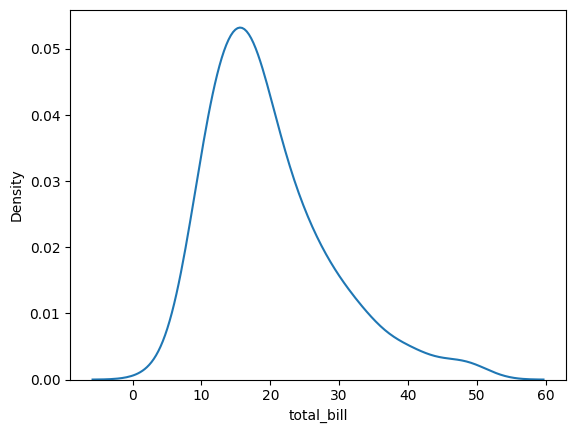

In [ ]:
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")

<Axes: xlabel='total_bill', ylabel='Count'>

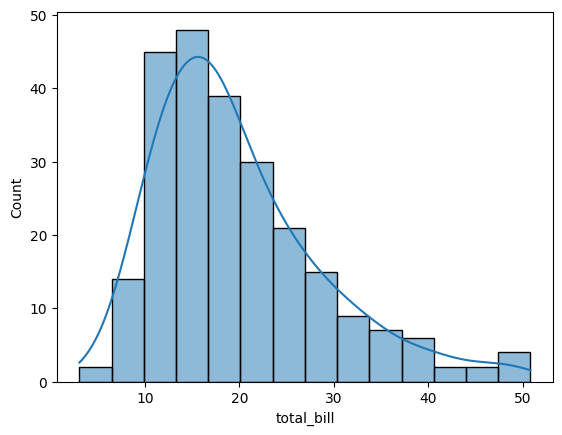

In [ ]:
sns.histplot(tips, x="total_bill", kde=True)